In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 39.1MB/s 
     |████████████████████████████████| 450kB 44.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=831338b0ce844496796fb45ab104a2b6e4e8abd8d95fd9eac2151e986f1074dc
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.models import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_path = '/content/drive/MyDrive/archive/CovidDataset/Train'
test_path = '/content/drive/MyDrive/archive/CovidDataset/Test'

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

In [9]:
train_set = train_data.flow_from_directory(train_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')
test_set = test_data.flow_from_directory(test_path,target_size = (224,224),batch_size = 16,class_mode = 'categorical')

Found 312 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [10]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
covid = model.fit(train_set,validation_data=test_set,epochs=20,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Train for 20 steps, validate for 3 steps
Epoch 1/20
20/20 [==============================] - 109s 5s/step - loss: 0.6760 - accuracy: 0.6186 - val_loss: 0.6603 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 87s 4s/step - loss: 0.4059 - accuracy: 0.8269 - val_loss: 0.4239 - val_accuracy: 0.8000
Epoch 3/20
20/20 [==============================] - 87s 4s/step - loss: 0.2277 - accuracy: 0.9006 - val_loss: 0.1847 - val_accuracy: 0.9500
Epoch 4/20
20/20 [==============================] - 87s 4s/step - loss: 0.1855 - accuracy: 0.9391 - val_loss: 0.2162 - val_accuracy: 0.9250
Epoch 5/20
20/20 [==============================] - 87s 4s/step - loss: 0.1625 - accuracy: 0.9359 - val_loss: 0.3660 - val_accuracy: 0.9000
Epoch 6/20
20/20 [==============================] - 87s 4s/step - loss: 0.2317 - accuracy: 0.9359 - val_loss: 0.2531 - val_accuracy: 0.9000
Epoch 7/20
20/20 [==============================] - 88s 4s/step - loss: 0.1456 - accuracy: 0.9615 - val_loss: 0.1865 -

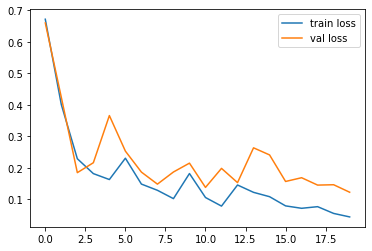

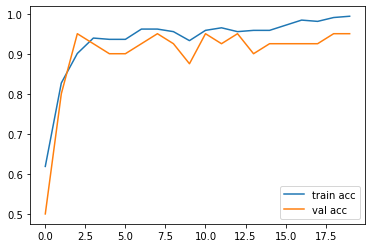

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(covid.history['loss'], label='train loss')
plt.plot(covid.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(covid.history['accuracy'], label='train acc')
plt.plot(covid.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
model.save('covid2.h5')